In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.metrics import Precision, Recall
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Define the paths for the training and testing datasets
train_dir = '/content/drive/MyDrive/cotton/TRAIN'
test_dir = '/content/drive/MyDrive/cotton/TEST'
bs=32
ep=29
img_size = (224,224)
# Data augmentation configuration for training and testing
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load training data from directory and apply data augmentation settings
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=bs,
    class_mode='categorical')

# Load test data from directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=bs,
    class_mode='categorical',
    shuffle=False)

Found 1196 images belonging to 4 classes.
Found 256 images belonging to 4 classes.


In [4]:

# Build the model structure
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))



model.summary()
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy' ,Precision(), Recall()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      11,944,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,963,652 (45.64 MB)

 Trainable params: 11,963,652 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
r=model.fit(train_generator,validation_data=test_generator, epochs=ep,  steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator))

Epoch 1/29


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 585s 12s/step - accuracy: 0.3205 - loss: 3.4135 - precision: 0.4061 - recall: 0.1735 - val_accuracy: 0.6094 - val_loss: 1.0151 - val_precision: 0.8710 - val_recall: 0.2109
Epoch 2/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/29


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


38/38 ━━━━━━━━━━━━━━━━━━━━ 59s 481ms/step - accuracy: 0.4986 - loss: 1.0749 - precision: 0.7954 - recall: 0.2659 - val_accuracy: 0.5742 - val_loss: 0.9161 - val_precision: 0.8904 - val_recall: 0.2539
Epoch 4/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 472ms/step - accuracy: 0.6090 - loss: 0.9154 - precision: 0.8437 - recall: 0.3624 - val_accuracy: 0.6758 - val_loss: 0.7806 - val_precision: 0.8117 - val_recall: 0.4883
Epoch 6/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 492ms/step - accuracy: 0.7053 - loss: 0.7649 - precision: 0.8114 - recall: 0.5598 - val_accuracy: 0.6992 - val_loss: 0.7695 - val_precision: 0.7898 - val_recall: 0.5430
Epoch 8/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - preci

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step


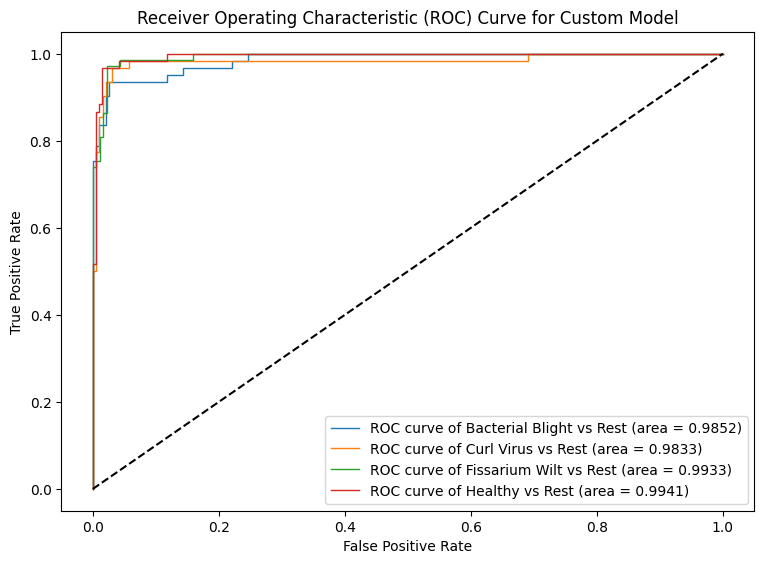

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming you have defined y_pred, y_test_bin, fpr, tpr, and roc_auc as in your code
y_pred = model.predict(test_generator)
y_test = test_generator.classes
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define disease names
disease_names = ['Bacterial Blight', 'Curl Virus', 'Fissarium Wilt', 'Healthy']

# Plot the ROC curves with disease names
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

line_widths = [1,1,1,1]  # Define line widths for each class

for i in range(4):
    plt.plot(fpr[i], tpr[i], linewidth=line_widths[i],
             label='ROC curve of {0} vs Rest (area = {1:0.4f})'.format(disease_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])  # Set x-axis limits with a slight padding
plt.ylim([-0.05, 1.05])  # Set y-axis limits with a slight padding
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Custom Model')
plt.legend(loc="lower right")

# Adjust the plot dimensions and add padding to the inner part
plt.tight_layout(pad=2.0)  # Adjust the padding value as needed

plt.show()


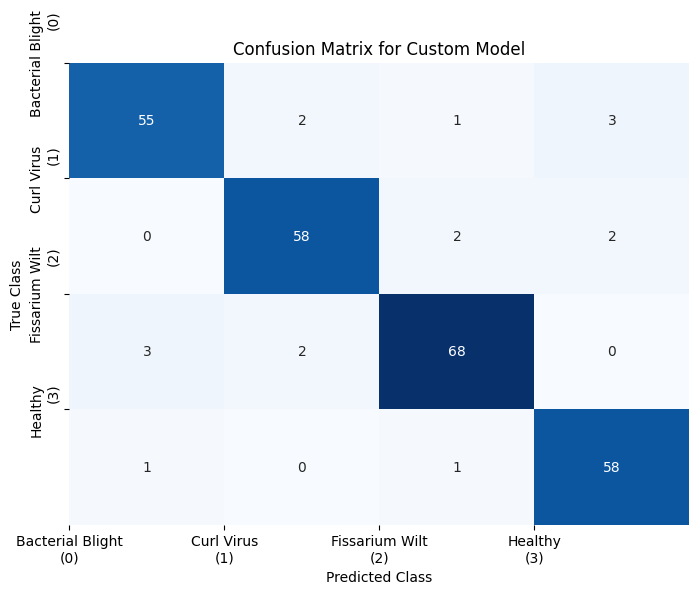

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have defined y_pred, y_test_bin, disease_names as in your code snippet
# y_pred = ...
# y_test_bin = ...
# disease_names = ...

# Get the predicted classes from probabilities
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set axis labels and title
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Custom Model')

# Set tick labels
tick_labels = [f'{disease_names[i]}\n({i})' for i in range(len(disease_names))]
plt.xticks(np.arange(len(disease_names)), tick_labels)
plt.yticks(np.arange(len(disease_names)), tick_labels)

# Show the plot
plt.show()


In [8]:
def plot_learningCurve(history, epoch):
# Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Custom Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
#Plot training & validation Loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Custom Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

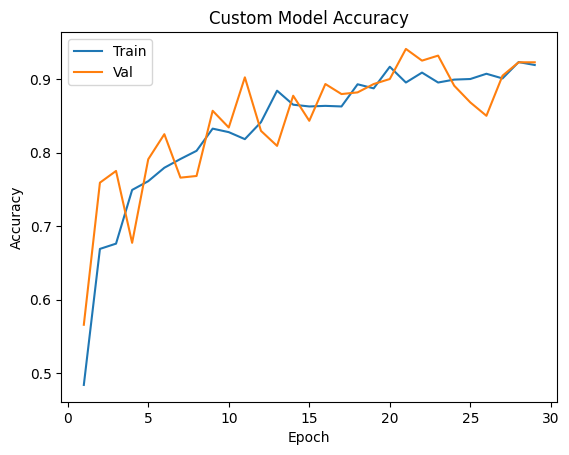

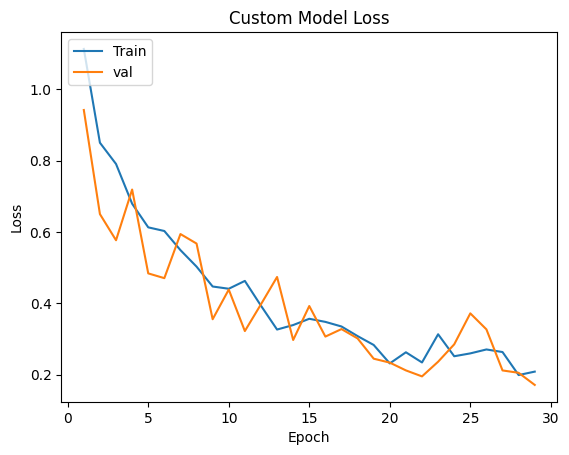

In [ ]:
plot_learningCurve(r, ep)

In [10]:

model.save('/content/drive/MyDrive/Models/custom_bs32_ep29.h5')
